In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [4]:
import argparse
import json
import os
import sys
import pandas as pd
import torch
import torch.optim as optim
import torch.utils.data
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import pickle as pkl
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt

from train.train import real_loss, fake_loss, scale, get_dataloader, build_network, weights_init_normal, train


In [5]:
data_dir = 'data/pytorch/processed_celeba_small' # The folder we will use for storing data
if not os.path.exists(data_dir): # Make sure that the folder exists
    os.makedirs(data_dir)

In [7]:
# Define function hyperparameters
batch_size = 32
img_size = 32

# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size, data_dir)


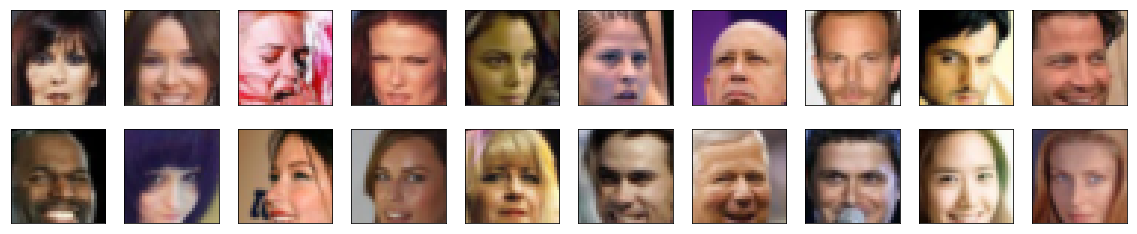

In [8]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

In [9]:
import sagemaker
import boto3

sagemaker_session = sagemaker.Session(boto3.session.Session(
    aws_access_key_id='xxxxxxxxxxx',
    aws_secret_access_key='xxxxxxxxxxxxxxxxxxxxxxx',
    region_name='us-east-1'))

bucket = sagemaker_session.default_bucket()

prefix = 'sagemaker/dcgan'

role = 'sagemaker_execution_role'



In [10]:
# input_data = sagemaker_session.upload_data(path=data_dir, bucket=bucket, key_prefix=prefix)

input_data = 's3://sagemaker-us-east-1-920852898073/sagemaker/dcgan'
input_data

's3://sagemaker-us-east-1-920852898073/sagemaker/dcgan'

In [11]:
import torch.optim as optim
from train.model import DataDiscriminator, DataGenerator

data_dir = 'data/pytorch/processed_celeba_small/'

# Load the training data.
train_loader = get_dataloader(64, 32, data_dir)
z_size = 100
conv_dim = 32

lr = 0.0002
beta1 =0.5
beta2 = 0.999
epochs = 5

device = torch.cuda.is_available()

# Build the model.

D, G = build_network(conv_dim, conv_dim, z_size)

# Create optimizers for the discriminator and generator
d_optimizer = optim.Adam(D.parameters(), lr, [beta1, beta2])
g_optimizer = optim.Adam(G.parameters(), lr, [beta1, beta2])

train(D, G, z_size, train_loader, epochs, d_optimizer, g_optimizer, device)

# Save the model parameters
G_path = os.path.join(data_dir, 'generator_model.pt')
with open(G_path, 'wb') as f:
    torch.save(G.cpu().state_dict(), f)


DataDiscriminator(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv5): Sequential(
    (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (fc): Linear(in_features=512, out_features=1, bias=True)
)

DataGenerator(
  (fc): Linear(in_features=100, out_features=1024, bias=True)

/home/shyambv/.local/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch [    1/    5] | d_loss: 1.4318 | g_loss: 1.1010
Epoch [    2/    5] | d_loss: 0.9448 | g_loss: 1.5053
Epoch [    3/    5] | d_loss: 0.8029 | g_loss: 1.6270
Epoch [    4/    5] | d_loss: 0.5287 | g_loss: 1.8784
Epoch [    5/    5] | d_loss: 0.5081 | g_loss: 2.0297
tensor([[[[-0.0053,  0.0382,  0.0187,  ...,  0.0349,  0.0311,  0.0258],
          [-0.0301,  0.0538, -0.0063,  ...,  0.0070, -0.0175,  0.0082],
          [ 0.0163,  0.0620,  0.0133,  ...,  0.0648,  0.0005,  0.0609],
          ...,
          [-0.0300,  0.0450, -0.0206,  ...,  0.0526, -0.0070,  0.0376],
          [ 0.0254,  0.0386,  0.0144,  ...,  0.0363,  0.0093,  0.0656],
          [ 0.0110,  0.0715, -0.0028,  ...,  0.0491,  0.0074,  0.0380]],

         [[-0.0572, -0.0680, -0.0768,  ..., -0.0737, -0.0660, -0.0593],
          [-0.0682, -0.0392,  0.0059,  ..., -0.0192,  0.0180, -0.0334],
          [-0.0576, -0.0364, -0.1306,  ..., -0.0425, -0.1349, -0.0253],
          ...,
          [-0.0599, -0.0325,  0.0251,  ..., -0.014

In [12]:
# Test if the model is working

# def view_samples(epoch, samples):
#     fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
#     for ax, img in zip(axes.flatten(), samples[epoch]):
#         img = img.detach().cpu().numpy()
#         img = np.transpose(img, (1, 2, 0))
#         img = ((img + 1)*255 / (2)).astype(np.uint8)
#         ax.xaxis.set_visible(False)
#         ax.yaxis.set_visible(False)
#         im = ax.imshow(img.reshape((32,32,3)))

# # Load samples from generator, taken while training
# with open('train_samples.pkl', 'rb') as f:
#     samples = pkl.load(f)
    
# _ = view_samples(-1, samples)

In [17]:
from sagemaker.pytorch import PyTorch

#Check the status of dataloader
estimator = PyTorch(entry_point="train.py",
                    source_dir="train",
                    role=role,
                    framework_version='0.4.0',
                    train_instance_count=1,
                    train_instance_type='ml.p2.8xlarge',
                    hyperparameters={
                        'epochs': 20,
                        'conv_dim': 64,
                    })

In [ ]:
estimator.fit({'training': input_data})

2020-04-05 13:49:37 Starting - Starting the training job...
2020-04-05 13:49:38 Starting - Launching requested ML instances............
2020-04-05 13:51:40 Starting - Preparing the instances for training......
2020-04-05 13:53:05 Downloading - Downloading input data.........................................................
2020-04-05 14:02:47 Training - Downloading the training image..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2020-04-05 14:03:03,225 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2020-04-05 14:03:03,303 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2020-04-05 14:03:06,323 sagemaker_pytorch_container.training INFO     Invoking user training script.
2020-04-05 14:03:06,615 sagemaker-containers INFO     Module train does not provide a setup.py. 
Generating setup.py
2020-04-05 14:03:06,615 sagemaker-containers INFO     Generat

Epoch [    1/   20] | d_loss: 1.3570 | g_loss: 1.5328
Epoch [    1/   20] | d_loss: 0.7919 | g_loss: 2.8875
Epoch [    1/   20] | d_loss: 1.0161 | g_loss: 2.7833
Epoch [    1/   20] | d_loss: 1.0669 | g_loss: 2.0658
Epoch [    1/   20] | d_loss: 1.1263 | g_loss: 1.9621
Epoch [    1/   20] | d_loss: 1.0472 | g_loss: 1.6076
Epoch [    1/   20] | d_loss: 1.2026 | g_loss: 1.8219
Epoch [    1/   20] | d_loss: 1.3696 | g_loss: 2.0384
Epoch [    1/   20] | d_loss: 1.4519 | g_loss: 2.8742
Epoch [    1/   20] | d_loss: 1.2774 | g_loss: 2.0198
Epoch [    1/   20] | d_loss: 1.0720 | g_loss: 1.2376
Epoch [    1/   20] | d_loss: 1.1908 | g_loss: 1.4505
Epoch [    1/   20] | d_loss: 1.3028 | g_loss: 2.2229
Epoch [    1/   20] | d_loss: 1.0788 | g_loss: 2.0681
Epoch [    1/   20] | d_loss: 1.0349 | g_loss: 1.4920
Epoch [    2/   20] | d_loss: 1.1469 | g_loss: 1.3477
Epoch [    2/   20] | d_loss: 1.0701 | g_loss: 1.4847
Epoch [    2/   20] | d_loss: 1.2297 | g_loss: 1.3100
Epoch [    2/   20] | d_loss

Epoch [    9/   20] | d_loss: 0.9091 | g_loss: 1.4019
Epoch [    9/   20] | d_loss: 0.8265 | g_loss: 1.4986
Epoch [    9/   20] | d_loss: 1.0092 | g_loss: 1.3508
Epoch [    9/   20] | d_loss: 1.1113 | g_loss: 1.8952
Epoch [   10/   20] | d_loss: 0.9070 | g_loss: 2.8078
Epoch [   10/   20] | d_loss: 0.7626 | g_loss: 1.9927
Epoch [   10/   20] | d_loss: 0.7737 | g_loss: 2.1970
Epoch [   10/   20] | d_loss: 1.5454 | g_loss: 0.8391
Epoch [   10/   20] | d_loss: 1.0142 | g_loss: 2.9334
Epoch [   10/   20] | d_loss: 1.0626 | g_loss: 3.3614
Epoch [   10/   20] | d_loss: 0.9661 | g_loss: 2.7797
Epoch [   10/   20] | d_loss: 0.8584 | g_loss: 1.7237
Epoch [   10/   20] | d_loss: 0.9667 | g_loss: 1.8352
Epoch [   10/   20] | d_loss: 0.9858 | g_loss: 2.4564
Epoch [   10/   20] | d_loss: 1.0528 | g_loss: 1.2024
Epoch [   10/   20] | d_loss: 1.1960 | g_loss: 3.1267
Epoch [   10/   20] | d_loss: 1.0448 | g_loss: 1.2096
Epoch [   10/   20] | d_loss: 1.1710 | g_loss: 1.1426
Epoch [   10/   20] | d_loss

In [ ]:
# Attach the estimator object if the session got killed

#estimator = estimator.attach('sagemaker-pytorch-2020-04-02-12-05-59-690')

In [111]:
predictor = estimator.deploy(initial_instance_count = 1, instance_type = 'ml.m5.large')

---------------!

In [41]:
#estimator.delete_endpoint()

In [116]:
fixed_z = np.random.uniform(-1, 1, size=(16, 100))
fixed_z = torch.from_numpy(fixed_z).float()

sample_y = predictor.predict(fixed_z)
sample_y_tensor = torch.tensor(sample_y)

In [70]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))

In [71]:
sample_y = predictor.predict(fixed_z)

In [83]:
sample_y_tensor = torch.tensor(sample_y)

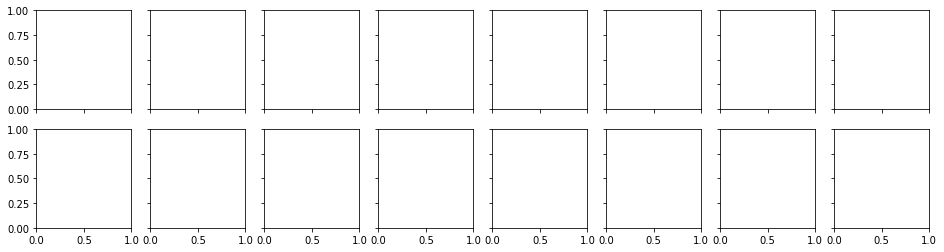

In [85]:
fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)

In [124]:
img = sample_y_tensor[15]

In [125]:
img = img.detach().cpu().numpy()
img =  ((img + 1)*255 / (2)).astype(np.uint8)

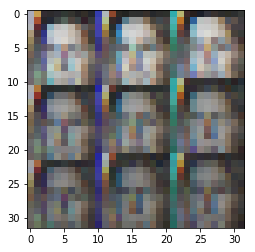

In [126]:
plt.imshow(img.reshape((32,32,3)))

In [50]:
# Deploymnent

In [80]:
from sagemaker.predictor import RealTimePredictor
from sagemaker.pytorch import PyTorchModel

class StringPredictor(RealTimePredictor):
    def __init__(self, endpoint_name, sagemaker_session):
        super(StringPredictor, self).__init__(endpoint_name, sagemaker_session, content_type='text/plain')

model = PyTorchModel(model_data=estimator.model_data,
                     role = role,
                     framework_version='0.4.0',
                     entry_point='predict.py',
                     source_dir='serve',
                     predictor_cls=StringPredictor,)
predictor = model.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

-----------------!

In [82]:
predictor.endpoint

'sagemaker-pytorch-2020-04-03-11-37-03-050'

In [79]:
#predictor.delete_endpoint()